### import necessary library 

In [4]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### check version 

In [5]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [7]:
print(tf.__version__)

1.12.0


### Download the IMDB Comment training set

In [9]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# 转化成多热向量
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

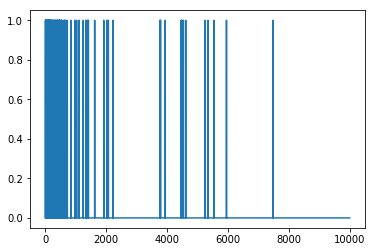

In [11]:
# Let's see the first array, 1.0 means the word corresponding to the index appears in the comment
plt.plot(train_data[0])

### find overfitting 

In [12]:
# 1. baseline model
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.4578 - acc: 0.8184 - binary_crossentropy: 0.4578 - val_loss: 0.3136 - val_acc: 0.8812 - val_binary_crossentropy: 0.3136
Epoch 2/20
 - 7s - loss: 0.2302 - acc: 0.9165 - binary_crossentropy: 0.2302 - val_loss: 0.2833 - val_acc: 0.8874 - val_binary_crossentropy: 0.2833
Epoch 3/20
 - 7s - loss: 0.1691 - acc: 0.9408 - binary_crossentropy: 0.1691 - val_loss: 0.2953 - val_acc: 0.8837 - val_binary_crossentropy: 0.2953
Epoch 4/20
 - 7s - loss: 0.1329 - acc: 0.9558 - binary_crossentropy: 0.1329 - val_loss: 0.3264 - val_acc: 0.8774 - val_binary_crossentropy: 0.3264
Epoch 5/20
 - 8s - loss: 0.1065 - acc: 0.9652 - binary_crossentropy: 0.1065 - val_loss: 0.3610 - val_acc: 0.8712 - val_binary_crossentropy: 0.3610
Epoch 6/20
 - 10s - loss: 0.0823 - acc: 0.9770 - binary_crossentropy: 0.0823 - val_loss: 0.3966 - val_acc: 0.8667 - val_binary_crossentropy: 0.3966
Epoch 7/20
 - 7s - loss: 0.0618 - acc: 0.9850 - binary_crossentrop

In [14]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [15]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.6487 - acc: 0.6685 - binary_crossentropy: 0.6487 - val_loss: 0.6006 - val_acc: 0.7683 - val_binary_crossentropy: 0.6006
Epoch 2/20
 - 9s - loss: 0.5391 - acc: 0.8332 - binary_crossentropy: 0.5391 - val_loss: 0.4994 - val_acc: 0.8497 - val_binary_crossentropy: 0.4994
Epoch 3/20
 - 8s - loss: 0.4226 - acc: 0.8886 - binary_crossentropy: 0.4226 - val_loss: 0.4008 - val_acc: 0.8734 - val_binary_crossentropy: 0.4008
Epoch 4/20
 - 7s - loss: 0.3266 - acc: 0.9085 - binary_crossentropy: 0.3266 - val_loss: 0.3410 - val_acc: 0.8824 - val_binary_crossentropy: 0.3410
Epoch 5/20
 - 6s - loss: 0.2688 - acc: 0.9217 - binary_crossentropy: 0.2688 - val_loss: 0.3109 - val_acc: 0.8856 - val_binary_crossentropy: 0.3109
Epoch 6/20
 - 6s - loss: 0.2323 - acc: 0.9293 - binary_crossentropy: 0.2323 - val_loss: 0.2945 - val_acc: 0.8879 - val_binary_crossentropy: 0.2945
Epoch 7/20
 - 7s - loss: 0.2069 - acc: 0.9356 - binary_crossentropy

In [16]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 26s - loss: 0.3420 - acc: 0.8540 - binary_crossentropy: 0.3420 - val_loss: 0.2930 - val_acc: 0.8806 - val_binary_crossentropy: 0.2930
Epoch 2/20
 - 20s - loss: 0.1343 - acc: 0.9518 - binary_crossentropy: 0.1343 - val_loss: 0.3550 - val_acc: 0.8636 - val_binary_crossentropy: 0.3550
Epoch 3/20
 - 18s - loss: 0.0404 - acc: 0.9886 - binary_crossentropy: 0.0404 - val_loss: 0.4372 - val_acc: 0.8680 - val_binary_crossentropy: 0.4372
Epoch 4/20
 - 19s - loss: 0.0066 - acc: 0.9990 - binary_crossentropy: 0.0066 - val_loss: 0.6002 - val_acc: 0.8694 - val_binary_crossentropy: 0.6002
Epoch 5/20
 - 20s - loss: 7.9226e-04 - acc: 1.0000 - binary_crossentropy: 7.9226e-04 - val_loss: 0.6843 - val_acc: 0.8708 - val_binary_crossentropy: 0.6843
Epoch 6/20
 - 19s - loss: 2.2150e-04 - acc: 1.0000 - binary_crossentropy: 2.2150e-04 - val_loss: 0.7233 - val_acc: 0.8707 - val_binary_crossentropy: 0.7233
Epoch 7/20
 - 17s - loss: 1.3780e-04 - acc: 1.

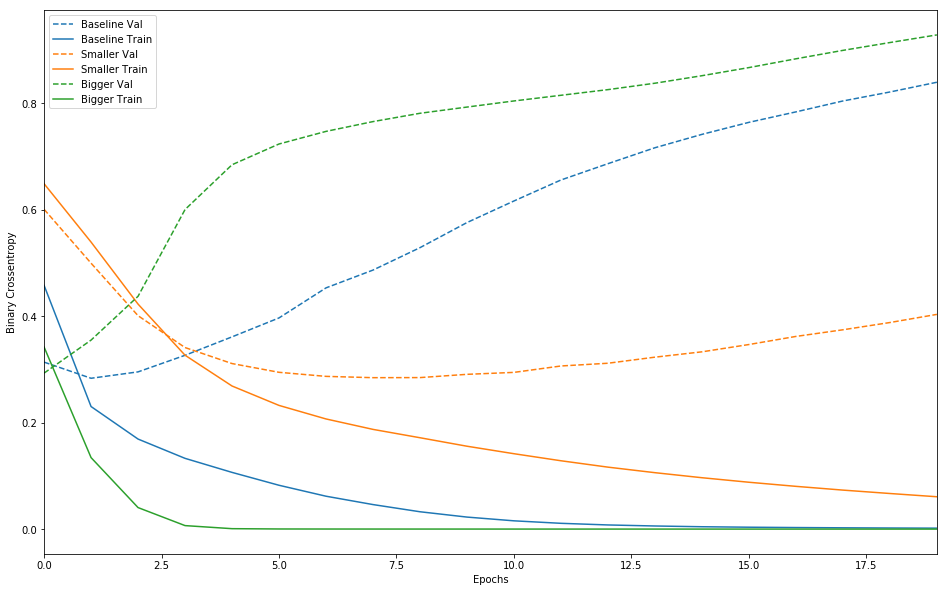

In [18]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

### use l2 regularizer 

In [19]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 13s - loss: 0.5607 - acc: 0.7757 - binary_crossentropy: 0.5219 - val_loss: 0.4106 - val_acc: 0.8744 - val_binary_crossentropy: 0.3727
Epoch 2/20
 - 7s - loss: 0.3228 - acc: 0.9060 - binary_crossentropy: 0.2803 - val_loss: 0.3378 - val_acc: 0.8860 - val_binary_crossentropy: 0.2911
Epoch 3/20
 - 6s - loss: 0.2611 - acc: 0.9275 - binary_crossentropy: 0.2112 - val_loss: 0.3361 - val_acc: 0.8870 - val_binary_crossentropy: 0.2838
Epoch 4/20
 - 6s - loss: 0.2328 - acc: 0.9391 - binary_crossentropy: 0.1785 - val_loss: 0.3475 - val_acc: 0.8833 - val_binary_crossentropy: 0.2917
Epoch 5/20
 - 6s - loss: 0.2182 - acc: 0.9459 - binary_crossentropy: 0.1606 - val_loss: 0.3596 - val_acc: 0.8804 - val_binary_crossentropy: 0.3008
Epoch 6/20
 - 6s - loss: 0.2046 - acc: 0.9521 - binary_crossentropy: 0.1448 - val_loss: 0.3756 - val_acc: 0.8766 - val_binary_crossentropy: 0.3152
Epoch 7/20
 - 7s - loss: 0.1959 - acc: 0.9562 - binary_crossentropy

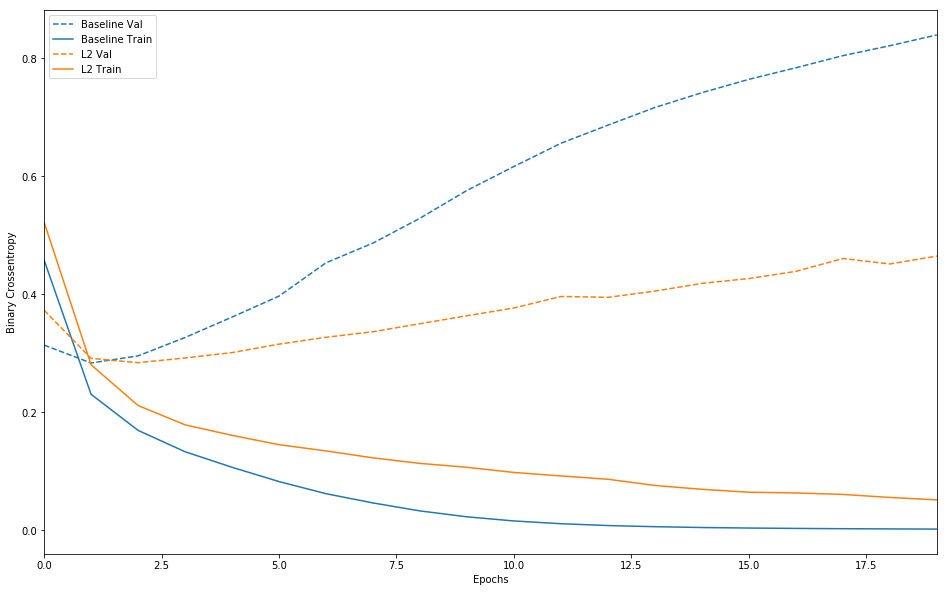

In [20]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Add dropout layer 

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.6163 - acc: 0.6601 - binary_crossentropy: 0.6163 - val_loss: 0.5068 - val_acc: 0.8524 - val_binary_crossentropy: 0.5068
Epoch 2/20
 - 7s - loss: 0.4687 - acc: 0.8168 - binary_crossentropy: 0.4687 - val_loss: 0.3726 - val_acc: 0.8820 - val_binary_crossentropy: 0.3726
Epoch 3/20
 - 6s - loss: 0.3567 - acc: 0.8770 - binary_crossentropy: 0.3567 - val_loss: 0.3087 - val_acc: 0.8883 - val_binary_crossentropy: 0.3087
Epoch 4/20
 - 6s - loss: 0.2934 - acc: 0.9061 - binary_crossentropy: 0.2934 - val_loss: 0.2873 - val_acc: 0.8855 - val_binary_crossentropy: 0.2873
Epoch 5/20
 - 6s - loss: 0.2522 - acc: 0.9209 - binary_crossentropy: 0.2522 - val_loss: 0.2878 - val_acc: 0.8867 - val_binary_crossentropy: 0.2878
Epoch 6/20
 - 6s - loss: 0.2184 - acc: 0.9346 - binary_crossentropy: 0.2184 - val_loss: 0.2969 - val_acc: 0.8863 - val_binary_crossentropy: 0.2969
Epoch 7/20
 - 6s - loss: 0.1878 - acc: 0.9442 - binary_crossentropy

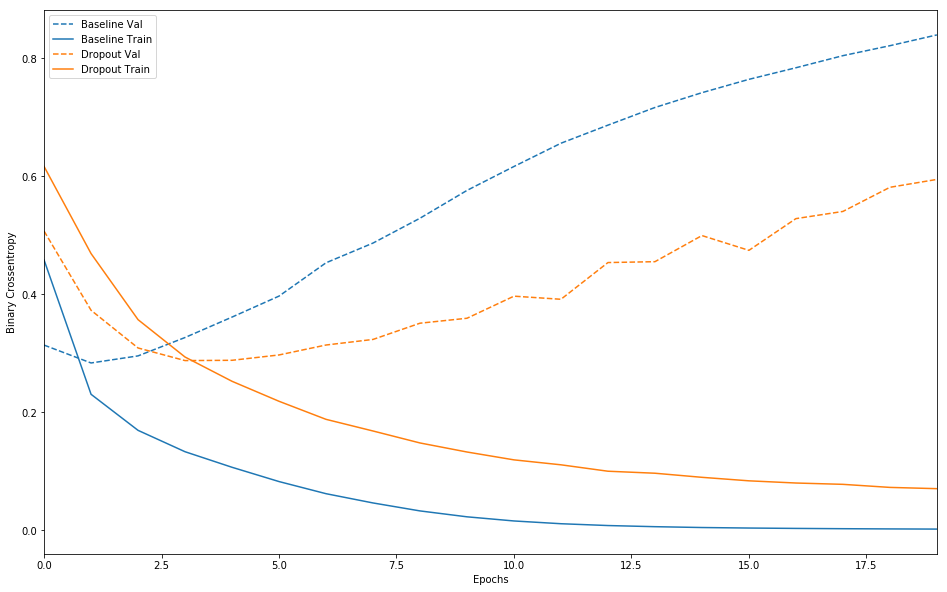

In [22]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])